# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part2.ipynb)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part2.ipynb)

For part 2 I'm going to be implementing a baseline model to predict and flag Tweets that are cyberbullying. For this part of the project I messed around with two models one being the RandomForestClassifier model and the ExtraTreesClassifier model.  The ExtraTreesClassifier model gave a better accuracy so I decided to use the ExtraTreesClassifeir model to predict cyberbullying Tweets.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Inporting the data and reading the data

In [2]:
input_data_path = 'https://raw.githubusercontent.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/main/'
training_data_file = 'CyberBullying_Comments_Dataset.csv'
df = pd.read_csv(input_data_path + training_data_file)
df.head()

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


Splitting the data

In [3]:
from sklearn.model_selection import train_test_split

X = df['Text'].copy()
y = df['CB_Label'].copy()

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# Tokenization

Next we're going to vectorize the data

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train_raw).toarray()

print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (8880, 15603)


numpy.ndarray

# Implementing Model

I've decided to implement the ExtraTreesClassifier as it was a decent model that I used in assignment 3

accuracy (on y_train): 0.9986


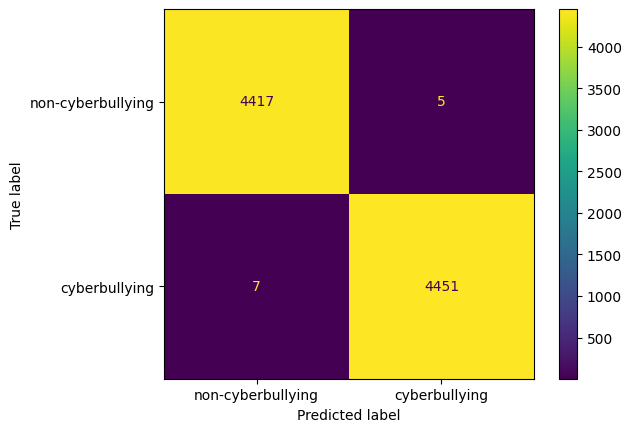

In [5]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#model = RandomForestClassifier(n_estimators=25)
model = ExtraTreesClassifier(n_estimators=25)
model = model.fit(X_train, y_train)

predictions_train = model.predict(X_train)

disp = ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_train), display_labels=['non-cyberbullying', 'cyberbullying'])
disp.plot()
print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

Checking to make sure the validation data looks like what we expect it to be

In [6]:
X_val = tfidf_vectorizer.transform(X_val_raw).toarray()
print(f"X_val.shape = {X_val.shape}")
type(X_val)

X_val.shape = (2220, 15603)


numpy.ndarray

accuracy (on y_val): 0.7541


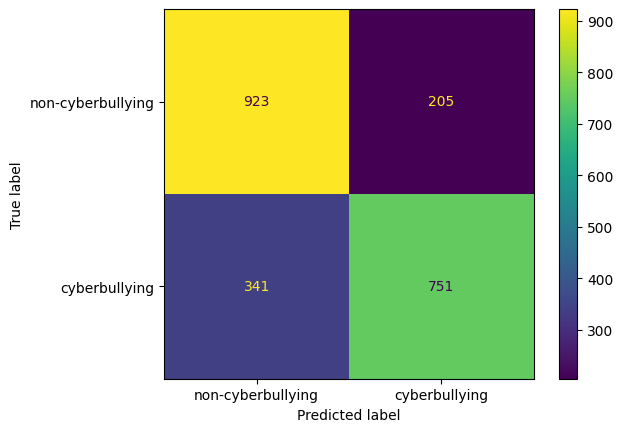

In [7]:
predictions_val = model.predict(X_val)
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, predictions_val), display_labels=['non-cyberbullying','cyberbullying'])
disp.plot()
print(f"accuracy (on y_val): {accuracy_score(y_val, predictions_val):.4f}")

Model Accuracy: 0.7545

So our accuracy ended up being about 75 percent so I'm going to tune the model to find a hyperparameter that will give me a better accuracy

# Finding Hyperparam

In [8]:
tune_model = True

In [9]:

from sklearn.metrics import log_loss

def tuneModel(hyperparam_value):
    #rf_model = RandomForestClassifier(n_estimators=hyperparam_value, random_state=5)
    rf_model = ExtraTreesClassifier(n_estimators=hyperparam_value, random_state=5)
    
    rf_model.fit(X_train, y_train)
    y_train_pred_prob = rf_model.predict_proba(X_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred_prob = rf_model.predict_proba(X_val)
    y_val_pred = rf_model.predict(X_val)
    train_loss = log_loss(y_train, y_train_pred_prob, labels=['0', '1'])
    train_acc = accuracy_score(y_train, y_train_pred)
    val_loss = log_loss(y_val, y_val_pred_prob, labels=['0', '1'])
    val_acc = accuracy_score(y_val, y_val_pred)
    return (train_loss, val_loss, train_acc, val_acc)

# Possible values for the hyperparameter are in the range of 5 to 150 (by 50)
hyp_param_vals = list(range(10,261,50)) # good values for n_estimators
#hyp_param_vals = [2,3] + list(range(5, 50, 10)) # good values for min_samples_split
metrics = []

if tune_model:
    for hp in hyp_param_vals:
        metrics.append(tuneModel(hp))


/opt/conda/lib/python3.10/site-packages/numpy/lib/arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/opt/conda/lib/python3.10/site-packages/numpy/lib/arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/opt/conda/lib/python3.10/site-packages/numpy/lib/arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/opt/conda/lib/python3.10/site-packages/numpy/lib/arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/opt/conda/lib/python3.10/site-packages/numpy/lib/arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar

Plot the results of the model's performance for each hyperparameter value

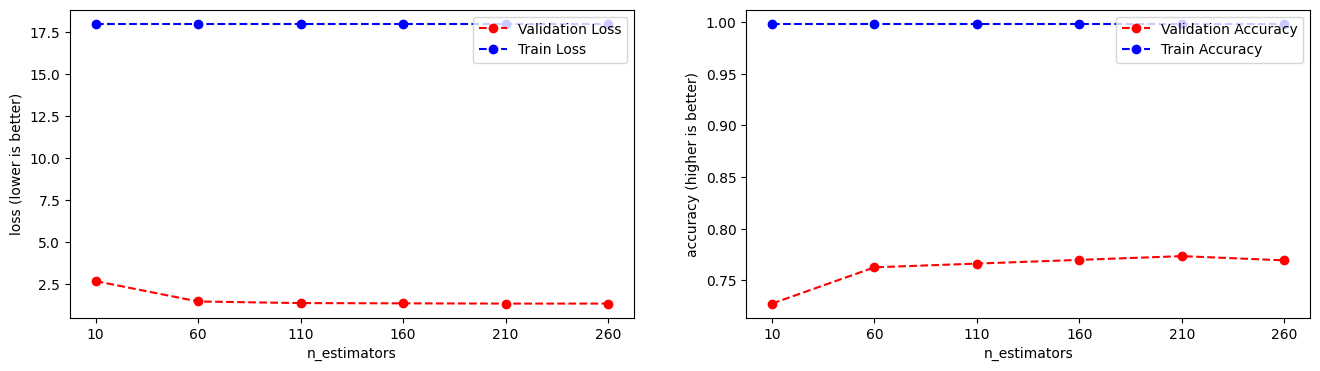

In [10]:

import matplotlib.pyplot as plt

if tune_model:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

    ax1.set_xticks(hyp_param_vals)
    ax1.set(xlabel="n_estimators", ylabel="loss (lower is better)")
    ax1.plot(hyp_param_vals, [metric[1] for metric in metrics], '--ro') # validation loss
    ax1.plot(hyp_param_vals, [metric[0] for metric in metrics], '--bo') # training loss
    ax1.legend(["Validation Loss", "Train Loss"], loc=1)

    ax2.set_xticks(hyp_param_vals)
    ax2.set(xlabel="n_estimators", ylabel="accuracy (higher is better)")
    ax2.plot(hyp_param_vals, [metric[3] for metric in metrics], '--ro') # validation accuracy
    ax2.plot(hyp_param_vals, [metric[2] for metric in metrics], '--bo') # training accuracy
    ax2.legend(["Validation Accuracy", "Train Accuracy"], loc=1)



So lets look at the accuracy and test lost for each hyperparameter

In [11]:
if tune_model:
    tuning_results = np.array([hyp_param_vals, [round(metric[1],2) for metric in metrics], [round(metric[3],2) for metric in metrics]])
    df_tuning_results = pd.DataFrame({'hyperparam':hyp_param_vals, 'test_loss':[metric[1] for metric in metrics], 'test_acc':[metric[3] for metric in metrics]})
    print(df_tuning_results)

   hyperparam  test_loss  test_acc
0          10   2.666534  0.727477
1          60   1.450896  0.762613
2         110   1.355050  0.766216
3         160   1.339845  0.769820
4         210   1.325732  0.773423
5         260   1.326592  0.769369


Based on the results above I decided to chose the hyperparam 210 as it gave the best accuracy and lowest test loss

# Refitting Model Using Hyperparam

Importing the data again

In [12]:
test_data_file = 'CyberBullying_Comments_Dataset.csv'
df_test = pd.read_csv(input_data_path + test_data_file)
df_test.head()

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


re-tokenizing the data

In [13]:
X_test = tfidf_vectorizer.transform(df_test['Text']).toarray()
print(f"X_test.shape = {X_test.shape}")
type(X_test)

X_test.shape = (11100, 15603)


numpy.ndarray

Refitting the model using the hyperparam 210

In [14]:
hyperparam_val = 210

model = ExtraTreesClassifier(n_estimators=hyperparam_val)
model = model.fit(X_train, y_train)

predictions_test = model.predict(X_test)
predictions_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In this dataset a 0 means non-cyberbullying and a 1 means cyberbullying

In [15]:
df_test['predictions'] = predictions_test
pd.set_option("display.max_colwidth", 248)
df_test.head(n=60)

,Text,CB_Label,predictions
0,damn there is someones nana up here at beach with one. dont think ic an steal and get to you quickly tho ;(,0,0
1,no kidding! dick clark was a corpse mechanically operated by the advertising companies,0,0
2,i read an article on jobros and thought damn we should cash in on our jobro pokemon. Perfect stocking stuffers haha,0,0
3,"I got one fucking day of sprinkles and now it's back to sunshine and douchebaggery.""",0,0
4,I was already listening to Elliott smith and I fucking hate kanye west. He's not a valid artist or human in my eyes,0,0
5,I told Derek to go fuck himself Devyn told us to calm down,0,0
6,I'm watching the new Smosh video and laughing my ass off.,0,0
7,My mom didn't like Catholicism because the idea of being a sinner from birth irked her and she loves gay people so yeah.,0,0
8,ya i know! lol AND big thunder mountain broke down! i only got 2 ride it once! i got a ton of bad luck. i think u stole it! bitch!,0,0
9,"lucky bitch.....""",0,0


Interestingly the model flagged comments that aren't cyberbullying as cyberbullying, however these comments the model flagged, without context seem to be offensive or harmful.  However the model does flag the non-cyberbullying tweets correctly.  I did use RandomForestClassifier in the begining and this model was able to flag the non-cyberbullying tweets more accurately than RandomForestClassifier.